## Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from MovieRatingEstimator import MovieRatingEstimator

import seaborn as sns

## Load data

In [2]:
ratings_path='ml-latest/ratings.csv'
movies_path='ml-latest/movies.csv'

In [3]:
ratings = pd.read_csv(ratings_path).drop('timestamp', axis=1)
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832157,330975,8340,2.0
33832158,330975,8493,2.5
33832159,330975,8622,4.0
33832160,330975,8665,3.0


In [4]:
movies = pd.read_csv(movies_path)
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


In [5]:
train, test = train_test_split(ratings, test_size=0.001,random_state=0)

## Evaluate rating estimator

In [6]:
mre = MovieRatingEstimator()

In [8]:
x,y = [],[]
for k in range(1,52,2):
    mre.fit(train,movies,n_clusters=k,verbose=True)
   
    test_cpy = test.copy()
    test_cpy['rating'] = mre.scaler.transform(test_cpy['rating'].values.reshape(-1,1))
    test_cpy['predicted_rating'] = test_cpy.apply(lambda x: mre.get_rating_estimate(x['userId'],x['movieId']),axis=1)
    
    test_cpy['error'] = abs(test_cpy['rating'] - test_cpy['predicted_rating'])
    mse = mean_squared_error(test_cpy['rating'], test_cpy['predicted_rating'])
    print(f"K={k}, MSE={mse}")
    x.append(k)
    y.append(mse)
    

/home/j-millet/anaconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


	Feature: (no genres listed)
	Feature: Action
	Feature: Adventure
	Feature: Animation
	Feature: Children
	Feature: Comedy
	Feature: Crime
	Feature: Documentary
	Feature: Drama
	Feature: Fantasy
	Feature: Film-Noir
	Feature: Horror
	Feature: IMAX
	Feature: Musical
	Feature: Mystery
	Feature: Romance
	Feature: Sci-Fi
	Feature: Thriller
	Feature: War
	Feature: Western
	Feature: year_0.0
	Feature: year_1.0
	Feature: year_2.0
	Feature: year_3.0
	Feature: year_4.0
Done :)
K=1, MSE=0.04630768129328536
K=3, MSE=0.039712698539355246
K=5, MSE=0.0388340652239941
K=7, MSE=0.038700796518337514
K=9, MSE=0.03841333267973151
K=11, MSE=0.03829988628889153
K=13, MSE=0.038191659270263655
K=15, MSE=0.03814637435386054
K=17, MSE=0.03827938976559852
K=19, MSE=0.03814875161963327
K=21, MSE=0.03831102060612177
K=23, MSE=0.038268322074502585
K=25, MSE=0.038250959849629396
K=27, MSE=0.03827158702454151
K=29, MSE=0.03824316497102219
K=31, MSE=0.03841893650511165
K=33, MSE=0.03844938938744321
K=35, MSE=0.03846294

/home/j-millet/anaconda3/envs/data-mining/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/j-millet/anaconda3/envs/data-mining/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Number of clusters')

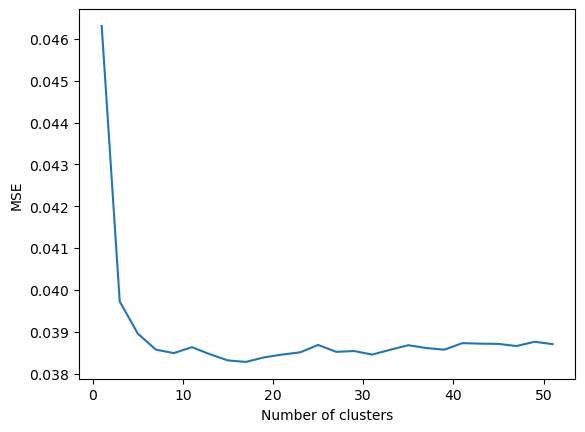

In [ ]:
sns.lineplot(x=x,y=y)
plt.ylabel('MSE')
plt.xlabel('Number of clusters')